In [1]:
from md_analyzer import *

# Analyse MD output given XDATCAR
def analyze_md_output(xdatcar_file="XDATCAR",fig_num=000, plot_structure=False, calc_velocities=False, calc_bond_stats=False):
    start = time.time()
    X=XDATCAR(xdatcar_file)
    print "\nLoading XDARCAR..."
    X.load()
    
    if plot_structure==True:
        print "\nPlotting atom positions..."
        fig = plt.figure(fig_num)
        for i in range(0,FN,10):
            X.plot_frame(i,fig,z_max=.250)
            
    if calc_velocities==True:
        print "\nCalculating velocities..."
        X.vdatcar()
    
    if calc_bond_stats==True:
        print "\nCalculating O-H bond length and angles..."
        X.OH_bond_stats()

    end=time.time()    
    print("Run time= %.3f seconds"%(end-start))



Loading XDARCAR...
Description:	Brucite
Scale Factor:	1.0
Lattice Vectors:
[[ 11.0814     0.         0.      ]
 [ -5.5407     9.596774   0.      ]
 [  0.         0.         9.687   ]]
Elements:	['Mg', 'O', 'H']
Atoms:   	[24 48 48]
Total Atoms:   	120
Lattice Parameters:
a 	b  	c 	alpha	beta	gamma
11.0814	11.0814	9.6870	90.00	90.00	120.00
unit-cell Volume: 1030.1707 angstrom
# u,v,w in fractional cooridnates
#	Atom_ID	u        	v        	w       
  1	Mg1	0.992312	0.999342	0.002247
  2	Mg2	0.992652	0.996670	0.503819
  3	Mg3	0.001585	0.501970	0.010257
  4	Mg4	0.509450	0.503934	0.987639
  5	Mg5	0.502062	0.002455	0.998153
  6	Mg6	0.990043	0.492571	0.510633
  7	Mg7	0.506527	0.499855	0.490731
  8	Mg8	0.504260	0.002675	0.506423
  9	Mg9	0.158874	0.338027	0.984698
 10	Mg10	0.826497	0.659654	0.012082
 11	Mg11	0.671790	0.848175	0.995675
 12	Mg12	0.336827	0.172716	0.009500
 13	Mg13	0.167606	0.823485	0.995067
 14	Mg14	0.839774	0.177447	0.009468
 15	Mg15	0.171440	0.343057	0.480419
 16	Mg16	0.827605

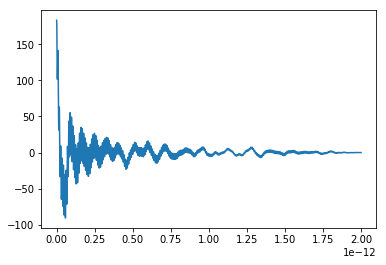

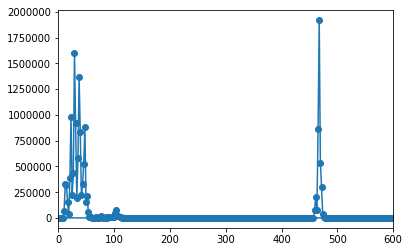

In [1]:
from md_analysis import *

######## USER PROGRAM ##########
FN=2000

plot_structure=False
calc_velocities=True
calc_bond_stats=False

#analyze_md_output("XDATCAR100",100, plot_structure, calc_velocities, calc_bond_stats)
analyze_md_output("XDATCAR300",300, plot_structure, calc_velocities, calc_bond_stats)

#show all plots (if any)
plt.show()


In [ ]:
def vac(vframes,atom_mass):
    atom_mass=np.array(atom_mass)
    nom=0.0
    denom=0.0
    vaf=[]
    dt=1e-15
    frame_count=len(vframes)
    tmax_frame=frame_count
    print("Frames"+str(frame_count))
    #C=vframes[0]*vframes[0]
    #vaf.append(sum(map(sum,C)))
    for t in range(0,frame_count): 
        C=vframes[t]*0
        for t0 in range(0,tmax_frame-t):
            C=C+vframes[t0]*vframes[t+t0]
        vaf.append(sum(map(sum,C)*atom_mass))
    vaf=np.array(vaf)
    ts=np.linspace(0, (1e-15)*frame_count, frame_count)

#    from scipy.fftpack import fft
    from scipy.signal import hanning
    '''
    w = hanning(len(vaf))
    ps = fft(vaf*w)
    ps = ps.real**2+ps.imag**2
    freq = np.fft.fftfreq(frame_count, dt)/1e12*4.13567 #meV
    gaussian = np.exp(-(freq/20.0)**2/2)
    ps = np.convolve(ps, gaussian, mode="full")
    print ps
    print len(ps)
    '''
    window = np.hanning(len(vaf)) #Apply Hann window
    ps = np.fft.fft(vaf*window)
    ps = ps.real**2+ps.imag**2
    freq = np.fft.fftfreq(frame_count, dt)/1e12*4.13567 #meV

    ps_file=""
	
    for i in range(len(ps)/2):
        ps_file=ps_file+"%.2f\t%.4f\n"%(freq[i],ps[i])
	
    ff = open("PSPEC",'w')
    ff.write(ps_file)
    ff.close()    
    
    plt.figure(1)
    plt.plot(ts, vaf)
    plt.figure(2)
    #plt.psd(vaf, 1024, 1.0/dt,pad_to=4096)
    plt.plot(freq,ps,"-o")  
    plt.xlim(0,600)
    
#    NFFT=1000
#    Fs = int(1.0/dt)
#    Pxx, freqs, bins, im = plt.specgram(vaf, NFFT=NFFT, Fs=Fs, noverlap=100)

    #plt.ylim(0,10e21)